## Tools

In [1]:
%pip install tensorflow[and-cuda]

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np # math library
import pandas as pd # dataframe library
import matplotlib.pyplot as plt # plotting library
import seaborn as sns # graphing library that builds ontop of mathplot
import tensorflow as tf # machine learning library
from tensorflow import keras # computer vision library from tensorflow 
import math
sns.set_style("darkgrid")

## Dataset
*Note: This is using a 5 class subset. The subset bird species are RUFOUS TREPE, HOUSE FINCH, D-ARNAUDS BARBET, OVENBIRD, ASIAN GREEN BEE EATER.
These 5 were choosen because they had the most available data out of the 500+ species in the orginial dataset.*

In [3]:
# training subset = RUFOUS TREPE, HOUSE FINCH, D-ARNAUDS BARBET, OVENBIRD, ASIAN GREEN BEE EATER
#csv format: class id,filepaths(relative),labels,data set(e.g. training,valid or test),scientific name
data = pd.read_csv("birds.csv")
data.head(10)

,class id,filepaths,labels,data set,scientific name
0,40.0,train/ASIAN GREEN BEE EATER/162.jpg,ASIAN GREEN BEE EATER,train,MEROPS ORIENTALIS
1,40.0,train/ASIAN GREEN BEE EATER/136.jpg,ASIAN GREEN BEE EATER,train,MEROPS ORIENTALIS
2,40.0,train/ASIAN GREEN BEE EATER/153.jpg,ASIAN GREEN BEE EATER,train,MEROPS ORIENTALIS
3,40.0,train/ASIAN GREEN BEE EATER/102.jpg,ASIAN GREEN BEE EATER,train,MEROPS ORIENTALIS
4,40.0,train/ASIAN GREEN BEE EATER/145.jpg,ASIAN GREEN BEE EATER,train,MEROPS ORIENTALIS
5,40.0,train/ASIAN GREEN BEE EATER/101.jpg,ASIAN GREEN BEE EATER,train,MEROPS ORIENTALIS
6,40.0,train/ASIAN GREEN BEE EATER/105.jpg,ASIAN GREEN BEE EATER,train,MEROPS ORIENTALIS
7,40.0,train/ASIAN GREEN BEE EATER/166.jpg,ASIAN GREEN BEE EATER,train,MEROPS ORIENTALIS
8,40.0,train/ASIAN GREEN BEE EATER/106.jpg,ASIAN GREEN BEE EATER,train,MEROPS ORIENTALIS
9,40.0,train/ASIAN GREEN BEE EATER/103.jpg,ASIAN GREEN BEE EATER,train,MEROPS ORIENTALIS


## Basic Exploratory Data Analysis (EDA)
The features are the pixel color values. To anaylze them the color values will be placed in bins(group by simiarlity) on a histogram which has distrbution line drawn on it.  The results is the line rapidly spiking to different positions due to the discrete nature of the data.

# Adjusting the bins
The number of bins can be adjusted via "BINS" variable. 255 is the max value of an given color channel, so BINS range is 1 to 255. By tweaking the number of bins the computation time can be reduced. By default I have set to 32, which reduces computation by a factor of 8.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


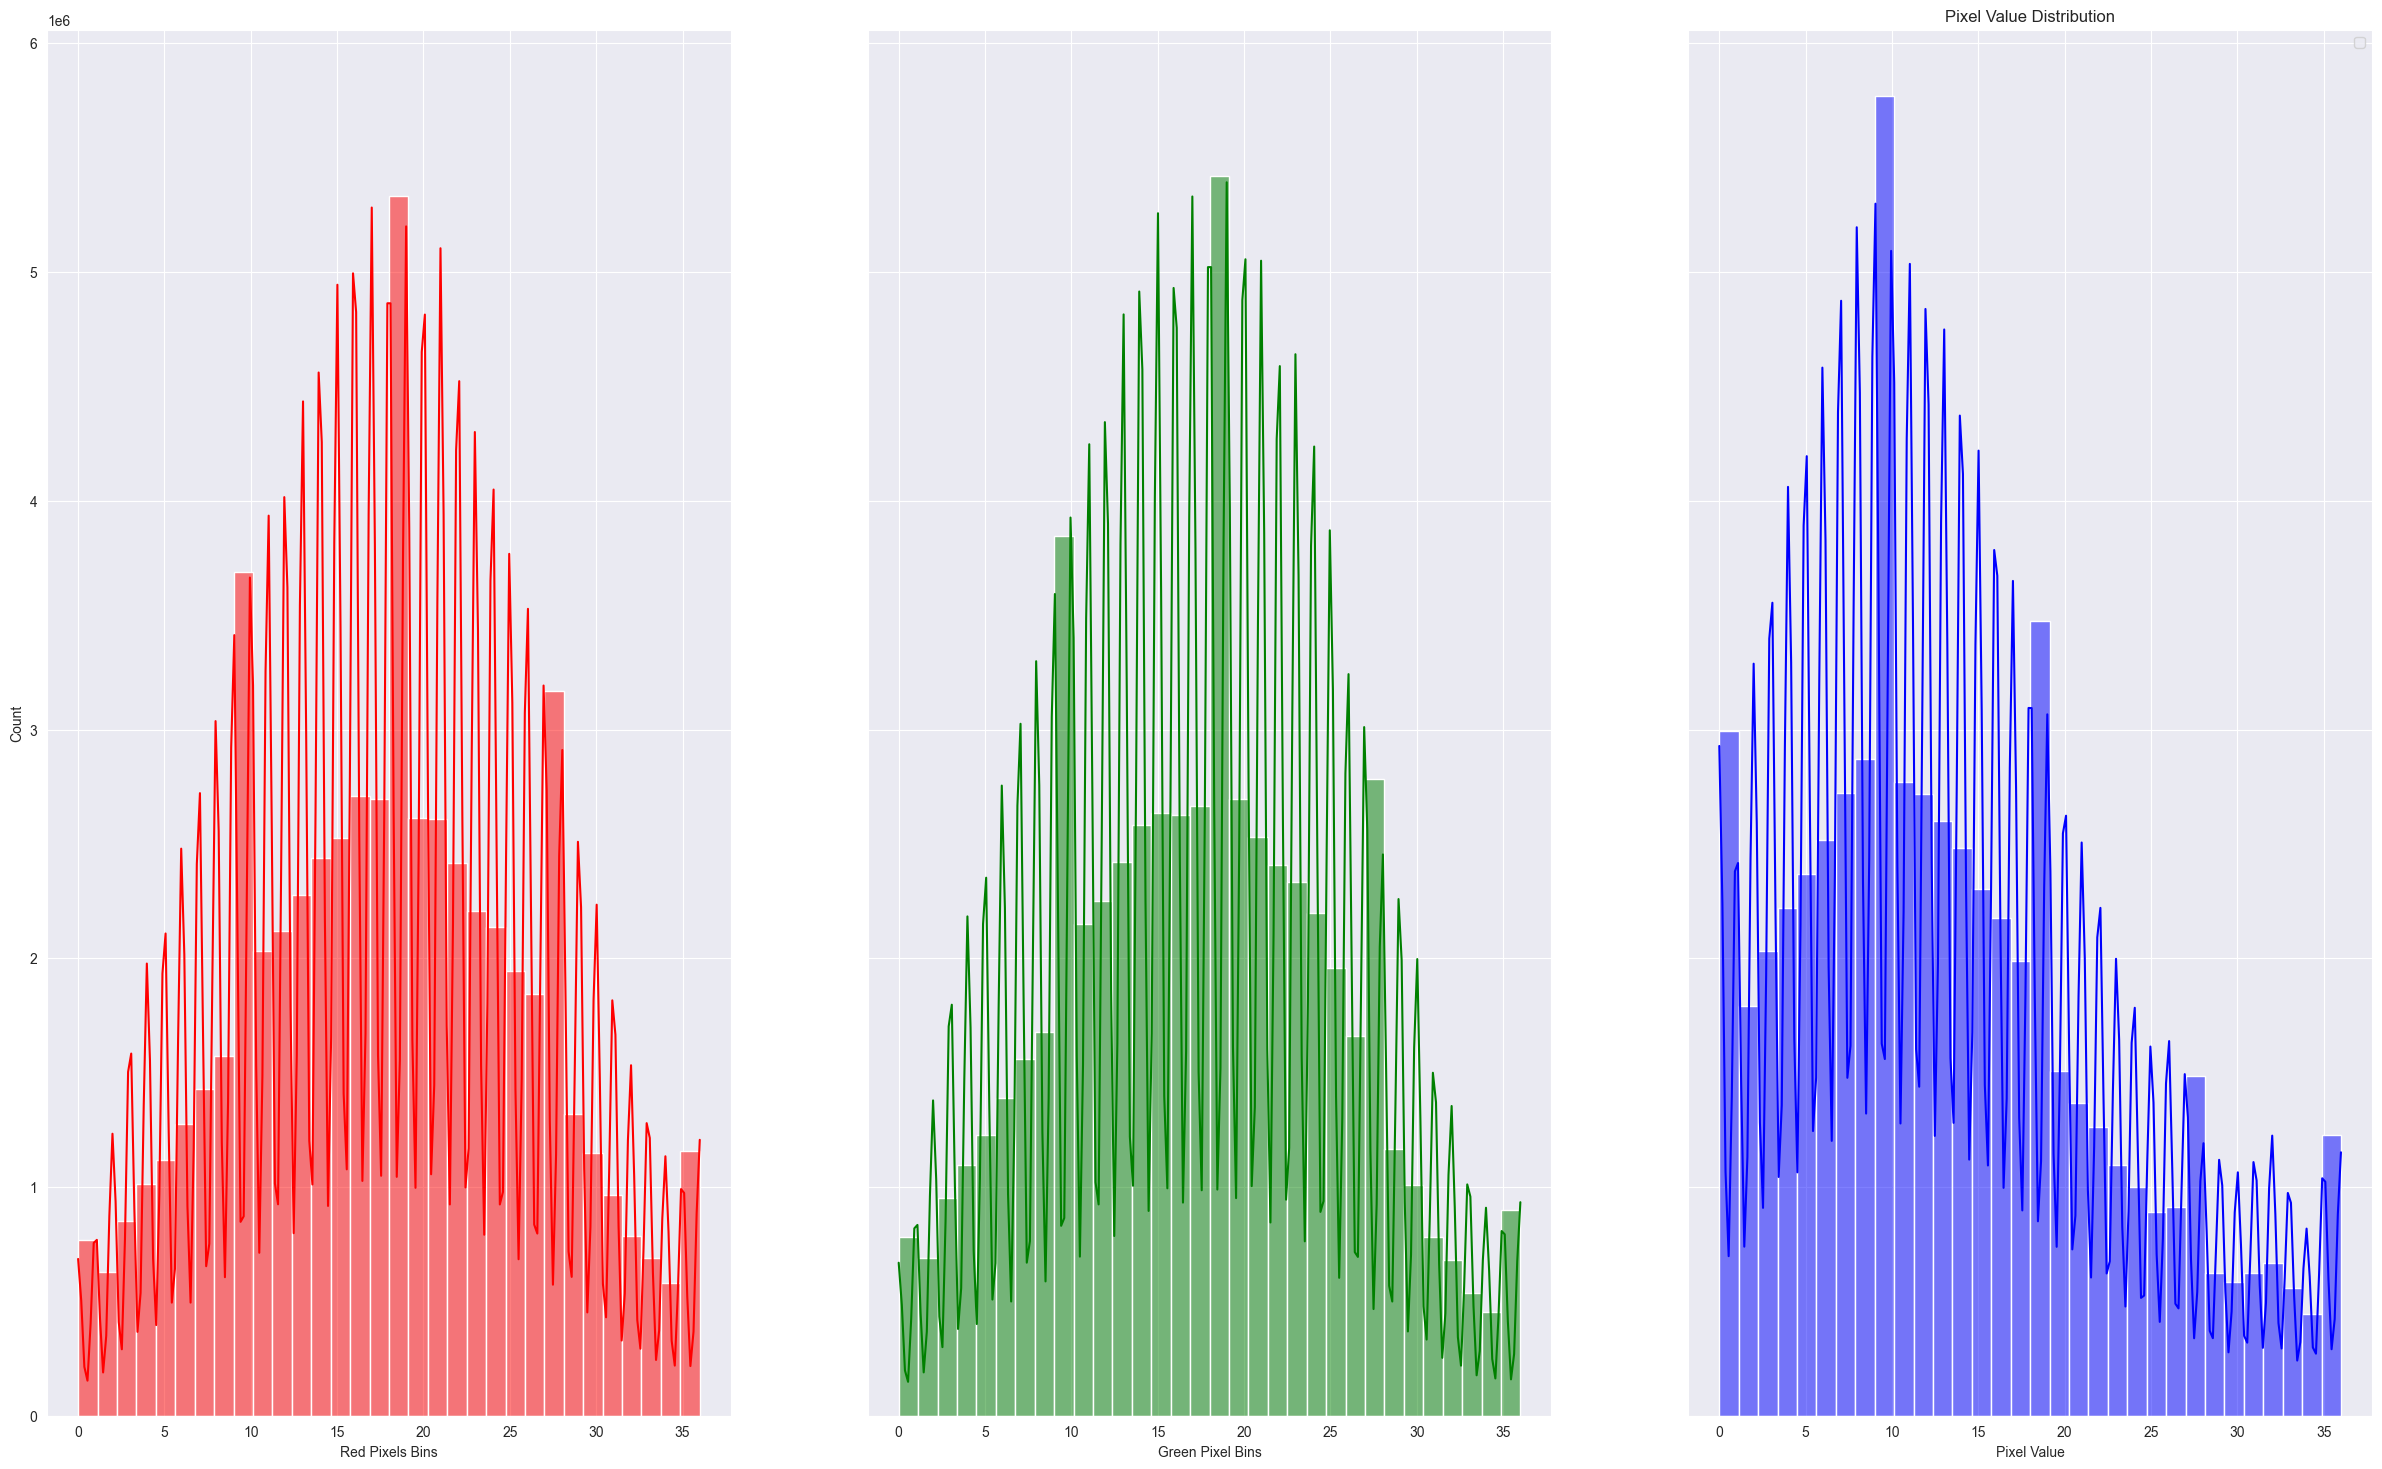

In [7]:
BINS = 32 # 1 <= BINS <= 255
if(BINS > 255 or BINS < 0):
        print("Invalid bin value!")
        exit
red_channel_image_data_list = []
green_channel_image_data_list = []
blue_channel_image_data_list = []
for index, row in data.iterrows():
    Factor = 255 // BINS
    bins_num = BINS
    # read data set column of the given row
    dataset = row['data set']
    # skip over non-training data(data hygiene protection) to avoid trainning on valid/test data
    if dataset != 'train':
        continue
    # read filepath col of the given row
    filepath = row['filepaths']
    # read label
    label = row['labels']
    # load image into computer vision using native image size(this data set has an universal image size)
    image = tf.keras.utils.load_img(filepath)
    # the image is 224x224x3 (width x height x color_channels)
    image_array = tf.keras.utils.img_to_array(image,data_format='channels_last')
    
    # group similar colors together to reduce computation time based on a constant value that can be adjusted
    image_array = image_array // Factor # Reduce from 255x255x255 to 255/factor x 255/factor x 255/factor this groups similar colors with range of factor
    # create enough color bins for each grouped color dynimcally.
    bins_num = BINS # floor division is used to create the groups which puts the remainder pixels into the last bucket
    
    # 3D Slice colstart:colstop, rowstart:rowstop, depthstart:depthstop
    # Splitting the image_array into R, G, B channels
    red_channel = image_array[:, :, 0]
    green_channel = image_array[:, :, 1]
    blue_channel = image_array[:, :, 2]
    # Assuming you have a list/array of images stored in 'image_data_list'
    # Concatenate the pixel values from all images
    red_channel_image_data_list.append(red_channel)
    green_channel_image_data_list.append(green_channel)
    blue_channel_image_data_list.append(blue_channel)
    
all_red_pixel_values = np.concatenate([image.ravel() for image in red_channel_image_data_list])
all_green_pixel_values = np.concatenate([image.ravel() for image in green_channel_image_data_list])
all_blue_pixel_values = np.concatenate([image.ravel() for image in blue_channel_image_data_list])
# Plots the smooth line
# TODO: Reduce plot height
fig, axes = plt.subplots(1, 3,figsize=(30,18), sharey=True)
sns.histplot(all_red_pixel_values, ax=axes[0],bins=bins_num, kde=True, color='red')
sns.histplot(all_green_pixel_values,ax=axes[1], bins=bins_num, kde=True, color='green')
sns.histplot(all_blue_pixel_values, ax=axes[2],bins=bins_num, kde=True, color='blue')

# Setting x-axis labels for each subplot
axes[0].set_xlabel('Red Pixels Bins')
axes[1].set_xlabel('Green Pixel Bins')
axes[2].set_xlabel('Blue Pixel Bins')

# Plot the histogram
#TODO: Title is pushed way right, gotta fix that
plt.title('Pixel Value Distribution')
#TODO: These labels don;t appear to be the ones used.
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
# Calculate and plot the mean line
# TODO: Remove or use legend! It generates a warning
plt.legend()


## Naive Bayes Implementation
Features = Pixel
P(Y=y), Y is the the target and is the precent chance of the target appearing. E.g. P(y) = 20%, if there are 20 out 100 sparrows in the data set of birds.
P(Feature_n | Y) = ???

In [ ]:
#Step 1 Computer vision!
# loop through dataframe and load image into computer vision
# constant for # bins(color groups) can +/- to +/- acc 
# Factor determines factor of reduction on color channels, e.g. 255 possible values per channel / 8 = 32 possible values per channel
# Factor is essetnially grouping similar colors together and controls how aggresive the grouping is.
FACTOR = 8
for index, row in data.iterrows():
    # read data set column of the given row
    dataset = row['data set']
    # skip over non-training data(data hygiene protection) to avoid trainning on valid/test data
    if dataset != 'train':
        continue
    # read filepath col of the given row
    filepath = row['filepaths']
    # read label
    label = row['labels']
    # load image into computer vision using native image size(this data set has an universal image size)
    image = tf.keras.utils.load_img(filepath)
    # the image is 224x224x3 (width x height x color_channels)
    image_array = tf.keras.utils.img_to_array(image,data_format='channels_last')
    
    # group similar colors together to reduce computation time based on a constant value that can be adjusted
    image_array = image_array // FACTOR # Reduce from 255x255x255 to 255/factor x 255/factor x 255/factor this groups similar colors with range of factor
    # create enough color bins for each grouped color dynimcally.
    bins_num = (255 // FACTOR) # floor division is used to create the groups which puts the remainder pixels into the last bucket
    
    # 3D Slice colstart:colstop, rowstart:rowstop, depthstart:depthstop
    # Splitting the image_array into R, G, B channels
    red_channel = image_array[:, :, 0]
    green_channel = image_array[:, :, 1]
    blue_channel = image_array[:, :, 2]
    
    # Create histograms data strucutre for each channel group (255 // 8 = 32)
    # x_hist = array, x_bins = bins start indexes in said array
    # note, since each color group has it's own bin, each index i corresponds to bin i making x_bins variable redundant.
    red_hist, red_bins = np.histogram(red_channel, bins=bins_num, range=(0, bins_num))
    green_hist, green_bins = np.histogram(green_channel, bins=bins_num, range=(0, bins_num))
    blue_hist, blue_bins = np.histogram(blue_channel, bins=bins_num, range=(0, bins_num))
    
    #TODO: Remove this break!
    break

# Naive Bayes Function
Function should be implemented in the block above. See planning doc for how to assign prob values.

In [ ]:
# take in the pixel color channel histograms derived from a given image
# take in target, feature name,
def Naive_Bayes(redHisto,greenHisto,blueHisto):
    # all data set images are in 224 * 224
    TOTAL_PIXELS = 224 * 224
    #P(Feature) = pixels in bin / total pixels(224x224)
    #P(Y) = # Y bird in data set / # total birds in dataset(need to check / dynamically cal earlier)
    #P(Feature | Y) = (Occurrences of color_bin(Feature) in images of Y) / (Total pixel occurrences in histograms of Y) 
    # The above requires some running sums.
    # Those are the 3 probs needed for naive bayes
    # Need to consider partial 
    pass

Placeholder for now. Seems like sklearn.metrics is what we are meant to be use. Which means sklearn integration somewhat.

In [ ]:
from sklearn.model_selection import train_test_split # not useful to me since we got a pre-divide dataset
train, test = train_test_split(data, test_size=.2, random_state=41) # see above comment

X_test = test.iloc[:,:-1].values # test features
Y_test = test.iloc[:,-1].values # test labels
Y_pred = naive_bayes_categorical(train, X=X_test, Y="diagnosis") # these and below are the of interest parts for my purposes.

from sklearn.metrics import confusion_matrix, f1_score
print(confusion_matrix(Y_test, Y_pred))
print(f1_score(Y_test, Y_pred))